# A2C Agent 

In [ ]:
import gym
from a2c import A2CAgent 
import time

# Create Gym environment
a2c_env = "CartPole-v1"
env = gym.make(a2c_env)

# Check agent class for initialization parameters and initialize agent
gamma = 0.9
lr = 1e-3

agent = A2CAgent(env, gamma, lr)

# Define training parameters
max_episodes = 500
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    trajectory = []
    state = env.reset()
    episode_reward = 0
    for step in range(max_steps):
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        trajectory.append((state, action, reward, next_state, done))
        episode_reward += reward  
        if done or step == max_steps:
            episode_rewards.append(episode_reward)
            print("Episode " + str(episode) + ": " + str(episode_reward))
            break
        state = next_state
    agent.update(trajectory, 0)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
a2c_rewards = episode_rewards
a2c_runtime = run_time

# DR TRPO Agent (KL) 

In [ ]:
import gym
from a2c_dr_trpo import DRTRPOAgent 
import time

# Create Gym environment
kl_env = "CartPole-v1"
env = gym.make(kl_env)

# Check agent class for initialization parameters and initialize agent
gamma = 0.9
lr = 1e-3

agent = DRTRPOAgent(env, gamma, lr)

############################### MC Updates  (Full Episode) ###############################

# Define training parameters
max_episodes = 800
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    first_state = env.reset()
    state_adv = []
    total_value_loss = 0
    
    episode_reward = 0
    # loop through the first action
    for i in range(env.action_space.n):
        env.reset()
        state = first_state
        action = i
        trajectory = []
        
        for step in range(max_steps):
            if step != 0:
                action = agent.get_action(state)
            next_state, reward, done, _ = env.step(action)
            trajectory.append((state, action, reward, next_state, done))
            episode_reward += reward  
            if done or step == max_steps-1:
                break
            state = next_state
            
        adv, value_loss = agent.compute_adv_mc(trajectory)
        state_adv.append(adv[1])
        total_value_loss += value_loss
        
    policy_loss = agent.compute_policy_loss_kl(state, state_adv)
    agent.update(value_loss, policy_loss)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
    avg_episode_reward = episode_reward/env.action_space.n
    episode_rewards.append(avg_episode_reward)
    print("Episode " + str(episode) + ": " + str(avg_episode_reward))

dr_trpo_kl_rewards = episode_rewards
dr_trpo_kl_runtime = run_time

# DR TRPO Agent (Wasserstein)

In [ ]:
import gym
from a2c_dr_trpo import DRTRPOAgent 
import time

wass_env = "Acrobot-v1"
# Create Gym environment
env = gym.make(wass_env)

# Check agent class for initialization parameters and initialize agent
gamma = 0.8
lr = 1e-4

agent = DRTRPOAgent(env, gamma, lr)

############################### MC Updates  (Full Episode) ###############################

# Define training parameters
max_episodes = 150
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    first_state = env.reset()
    state_adv = []
    total_value_loss = 0
    
    episode_reward = 0
    # loop through the first action
    for i in range(env.action_space.n):
        env.reset()
        state = first_state
        action = i
        trajectory = []
        
        for step in range(max_steps):
            if step != 0:
                action = agent.get_action(state)
            next_state, reward, done, _ = env.step(action)
            trajectory.append((state, action, reward, next_state, done))
            episode_reward += reward  
            if done or step == max_steps-1:
                break
            state = next_state
            
        adv, value_loss = agent.compute_adv_mc(trajectory)
        state_adv.append(adv[1])
        total_value_loss += value_loss
        
    policy_loss = agent.compute_policy_loss_wass(state, state_adv)
    agent.update(value_loss, policy_loss)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
    avg_episode_reward = episode_reward/env.action_space.n
    episode_rewards.append(avg_episode_reward)
    print("Episode " + str(episode) + ": " + str(avg_episode_reward))

dr_trpo_wass_rewards = episode_rewards
dr_trpo_wass_runtime = run_time

Episode 0: -500.0
Episode 1: -500.0
Episode 2: -466.6666666666667
Episode 3: -461.3333333333333
Episode 4: -489.6666666666667
Episode 5: -456.0
Episode 6: -500.0
Episode 7: -419.0
Episode 8: -450.0
Episode 9: -500.0
Episode 10: -488.3333333333333
Episode 11: -413.6666666666667
Episode 12: -462.3333333333333
Episode 13: -487.6666666666667
Episode 14: -480.6666666666667
Episode 15: -500.0
Episode 16: -471.3333333333333
Episode 17: -434.0
Episode 18: -414.0
Episode 19: -445.3333333333333
Episode 20: -496.6666666666667
Episode 21: -413.3333333333333
Episode 22: -480.0
Episode 23: -481.0
Episode 24: -432.3333333333333
Episode 25: -500.0
Episode 26: -500.0
Episode 27: -491.3333333333333
Episode 28: -414.6666666666667
Episode 29: -500.0
Episode 30: -478.3333333333333
Episode 31: -443.3333333333333
Episode 32: -482.3333333333333
Episode 33: -448.3333333333333
Episode 34: -488.0
Episode 35: -431.0
Episode 36: -451.0
Episode 37: -500.0
Episode 38: -350.0
Episode 39: -485.3333333333333
Episode 40

# Graph

In [3]:
import matplotlib.pyplot as plt
import time
import numpy as np

In [ ]:
plt.plot(a2c_runtime, a2c_rewards)
plt.ylabel('Rewards, A2C')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/a2c/' + a2c_env + + '-' + str(time.time()) + '.csv' 
out = np.column_stack((a2c_runtime, a2c_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')

In [ ]:
plt.plot(dr_trpo_kl_runtime, dr_trpo_kl_rewards)
plt.ylabel('Rewards, DR TRPO KL')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/dr_trpo_kl/' + kl_env + '-' + str(time.time()) + '.csv' 
out = np.column_stack((dr_trpo_kl_runtime, dr_trpo_kl_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')

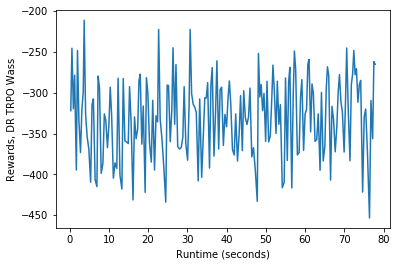

In [4]:
plt.plot(dr_trpo_wass_runtime, dr_trpo_wass_rewards)
plt.ylabel('Rewards, DR TRPO Wass')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/dr_trpo_wass/' + wass_env + '-' + str(time.time()) + '.csv' 
out = np.column_stack((dr_trpo_wass_runtime, dr_trpo_wass_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')